# Project Title - EpiRecipes Visualization Application

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv('epi_r.csv')

In [33]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [35]:
df.shape

(20052, 680)

# Data Cleaning

In [36]:
print('No of duplicates: {}'.format(sum(df.duplicated())))

No of duplicates: 1801


In [37]:
df1 = df.drop_duplicates()

In [38]:
df1.shape

(18251, 680)

In [39]:
print('No of duplicates: {}'.format(sum(df1.duplicated())))

No of duplicates: 0


In [40]:
df1.isnull().sum()

title            0
rating           0
calories      3749
protein       3781
fat           3801
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [41]:
#checking nan values in each column
for i in df1.columns:
    if sum(df1[i].isnull()) > 0:
        print(i, sum(df1[i].isnull()))

calories 3749
protein 3781
fat 3801
sodium 3750


In [42]:
df2 = df1.dropna()
df2.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64

In [43]:
#checking nan values in each column
for i in df2.columns:
    if sum(df2[i].isnull()) > 0:
        print(i, sum(df1[i].isnull()))

In [44]:
df2.shape

(14446, 680)

# Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Count')

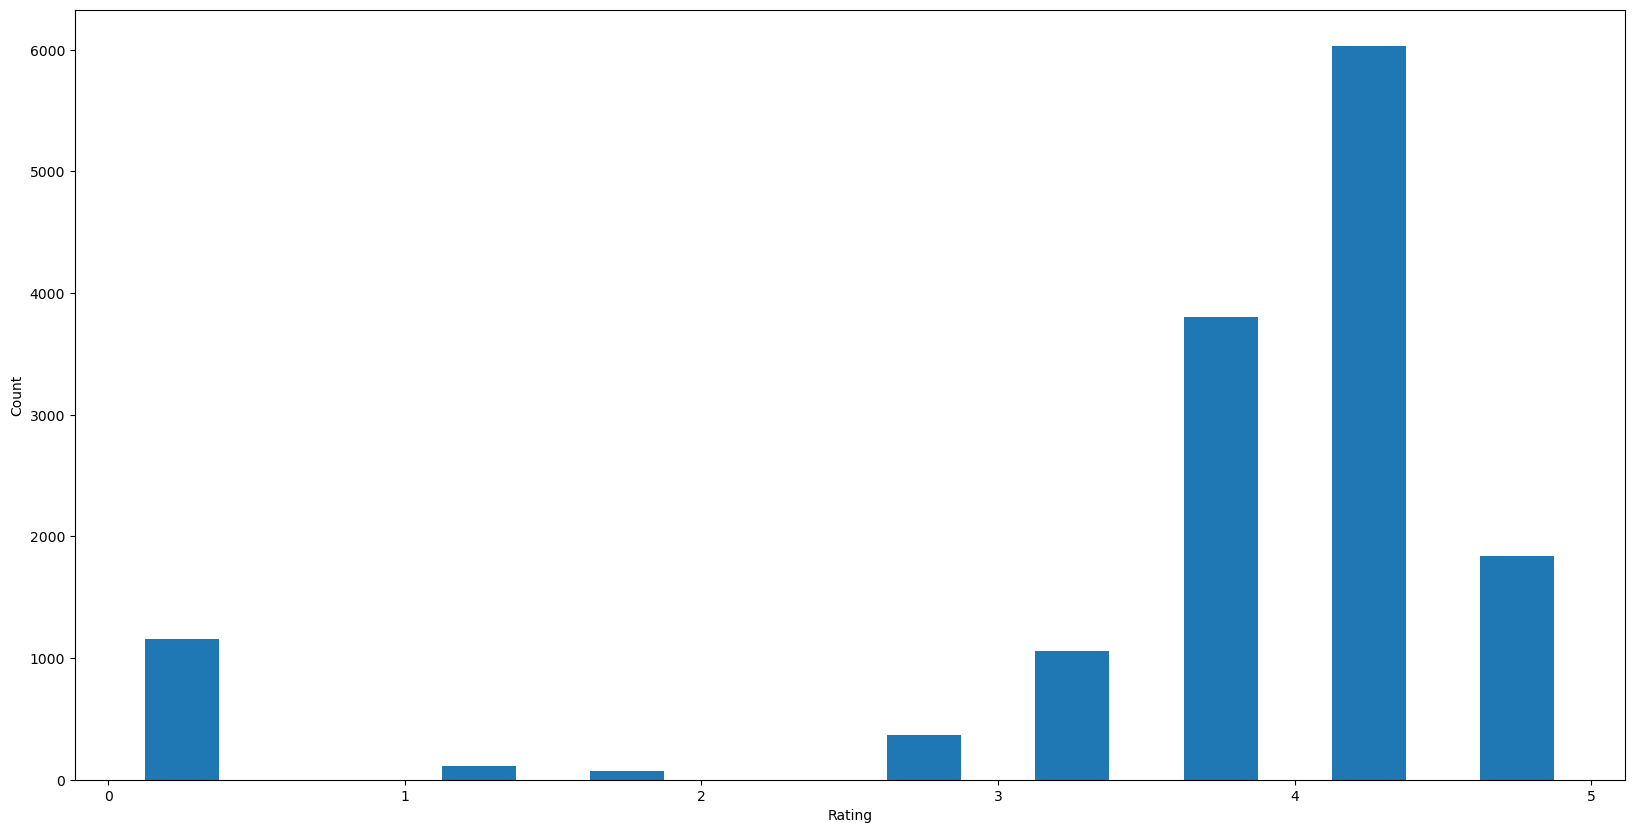

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df2["rating"], rwidth=0.5)
plt.xlabel("Rating")
plt.ylabel("Count")

## Observation:
            Most of the recipes has rating in between 3.6 to 4.4.

In [46]:
ingredients = ['almond', 'anchovy', 'apple', 'apple juice', 'apricot', 'artichoke', 'arugula', 'asian pear', 'asparagus', 
               'avocado', 'bacon', 'banana', 'barley', 'basil', 'bass', 'bean', 'beef', 'beef rib', 'beef shank', 
               'beef tenderloin', 'beet', 'bell pepper', 'berry', 'biscuit', 'blackberry', 'blue cheese', 'blueberry', 
               'bok choy', 'bran', 'breadcrumbs', 'brie', 'brisket', 'broccoli', 'broccoli rabe', 'brown rice', 
               'brussel sprout', 'bulgur', 'butter', 'buttermilk', 'butternut squash', 'butterscotch/caramel', 'cabbage', 
               'cantaloupe', 'capers', 'carrot', 'cashew', 'cauliflower', 'caviar', 'celery', 'chard', 'cheddar', 'cheese', 
               'cherry', 'chestnut', 'chicken', 'chickpea', 'chile pepper', 'chive', 'chocolate', 'cilantro', 'citrus', 
               'clam', 'coconut', 'cod', 'coffee', 'collard greens', 'corn', 'cornmeal', 'cottage cheese', 'couscous', 'crab', 
               'cranberry', 'cranberry sauce', 'cream cheese', 'créme de cacao', 'cucumber', 'currant', 'date', 'dill', 
               'dried fruit', 'duck', 'egg', 'eggplant', 'endive', 'escarole', 'fennel', 'feta', 'fig', 'fish', 'fontina', 
               'garlic','goat cheese', 'goose', 'gouda', 'granola', 'grape', 'grapefruit', 'green bean', 'green onion/scallion',
               'ground beef', 'ground lamb', 'guava', 'halibut', 'ham', 'hamburger', 'hazelnut', 'honey', 'honeydew', 
               'horseradish', 'hot pepper', 'hummus', 'jalapeño', 'jam or jelly', 'jerusalem artichoke', 'jícama', 'kale', 
               'kirsch', 'kiwi', 'lamb', 'lamb chop', 'lamb shank', 'leek', 'legume', 'lemon', 'lemon juice', 'lemongrass', 
               'lentil', 'lettuce', 'lima bean', 'lime', 'lime juice', 'lingonberry', 'lobster', 'lychee', 'macadamia nut', 
               'mango', 'maple syrup', 'marscarpone', 'marshmallow', 'meat', 'meatball', 'meatloaf', 'melon', 'milk/cream', 
               'mint', 'molasses', 'monterey jack', 'mozzarella', 'mushroom', 'mussel', 'mustard', 'mustard greens', 
               'nectarine', 'noodle', 'nut', 'oat', 'oatmeal', 'octopus', 'okra', 'olive', 'onion', 'orange', 'orange juice', 
               'orzo', 'oyster', 'papaya', 'parmesan', 'parsley', 'parsnip', 'passion fruit', 'pasta', 'pea', 'peach', 'peanut',
               'peanut butter', 'pear', 'pecan', 'pepper', 'persimmon', 'phyllo/puff pastry dough', 'pickles', 'pine nut', 
               'pineapple', 'pistachio', 'plantain', 'plum', 'poblano', 'pomegranate', 'pomegranate juice', 'pork', 'pork chop',
               'pork rib', 'pork tenderloin', 'potato', 'poultry', 'poultry sausage', 'prosciutto', 'pumpkin', 'quail', 
               'quince', 'quinoa', 'rack of lamb', 'radicchio', 'radish', 'raisin', 'raspberry', 'rhubarb', 'rice', 'ricotta', 
               'rutabaga', 'rye', 'salmon', 'sausage', 'scallop', 'seafood', 'semolina', 'sesame', 'sesame oil', 'shallot', 
               'shellfish', 'shrimp', 'sour cream', 'soy', 'soy sauce', 'spinach', 'squash', 'squid', 'steak', 'stock', 
               'strawberry', 'sugar snap pea', 'sweet potato/yam', 'swiss cheese', 'swordfish', 'tangerine', 'tapioca', 
               'tarragon', 'tilapia', 'tofu', 'tomatillo', 'tomato', 'tree nut', 'tropical fruit', 'trout', 'tuna', 'turnip', 
               'veal', 'venison', 'vinegar', 'walnut', 'watercress', 'watermelon', 'whole wheat', 'wild rice', 'yellow squash', 
               'yogurt', 'yuca', 'zucchini', 'turkey']
df2[ingredients][df2.rating >= 4.0].sum().sort_values()

caviar               0.0
meatloaf             0.0
cranberry sauce      0.0
marscarpone          1.0
orzo                 1.0
                   ...  
garlic             673.0
egg                726.0
tomato             885.0
milk/cream         902.0
onion              911.0
Length: 259, dtype: float64

In [47]:
df2[ingredients][df2.rating >= 4.0].sum().sort_values(ascending=False)

onion              911.0
milk/cream         902.0
tomato             885.0
egg                726.0
garlic             673.0
                   ...  
meatball             1.0
marscarpone          1.0
cranberry sauce      0.0
meatloaf             0.0
caviar               0.0
Length: 259, dtype: float64

In [48]:
allIngredients = df2[ingredients][df2.rating >= 4.0].sum().sort_values(ascending=False)
allIngredients = allIngredients[:10]
allIngredients

onion         911.0
milk/cream    902.0
tomato        885.0
egg           726.0
garlic        673.0
cheese        603.0
chicken       499.0
potato        459.0
pork          433.0
lemon         432.0
dtype: float64

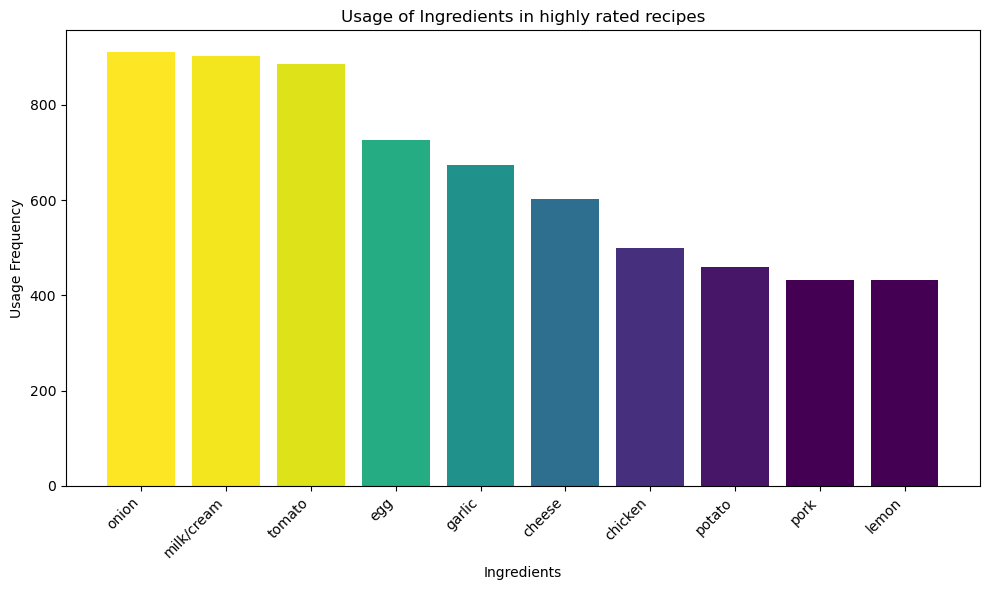

In [50]:
# Create a bar plot
import matplotlib

cmap = matplotlib.colormaps['viridis']
norm = plt.Normalize(allIngredients.min(), allIngredients.max())
plt.figure(figsize=(10, 6))
plt.bar(allIngredients.index, allIngredients.values, color=cmap(norm(allIngredients.values)))
plt.xlabel('Ingredients')
plt.ylabel('Usage Frequency')
plt.title('Usage of Ingredients in highly rated recipes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation:
            Top 10 common ingredients in highly rated(above 4.0) recipes.

Text(0.5, 1.0, 'Composistion of Veg and Non-Veg Recipes in high ratings')

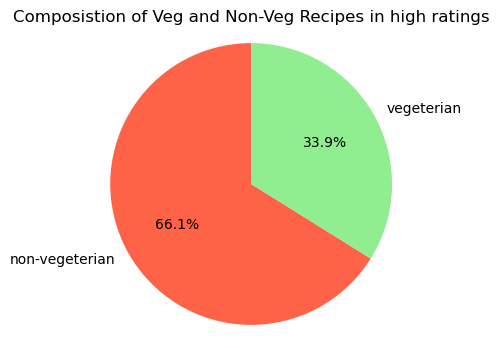

In [51]:
veg_nv = df2[df2["rating"] >= 4.0]
veg_nv = veg_nv.groupby(["vegetarian"])["title"].count()
plt.figure(figsize=(4,4))
plt.pie(veg_nv,labels=["non-vegeterian","vegeterian"],autopct='%1.1f%%', startangle=90, colors=["tomato","lightgreen"])
plt.axis("equal")
plt.title("Composistion of Veg and Non-Veg Recipes in high ratings")

## Observation:
            Most of the highly rated(above 4.0) recipes are basically non-veg(66.1%).

In [52]:
nvg = df2[ingredients][df2.rating >= 4.0][df2.vegetarian==0].sum().sort_values(ascending=False)
nvg = nvg[:10]
nvg

onion         689.0
tomato        667.0
garlic        520.0
milk/cream    507.0
chicken       499.0
pork          432.0
fish          385.0
beef          379.0
egg           346.0
cheese        325.0
dtype: float64

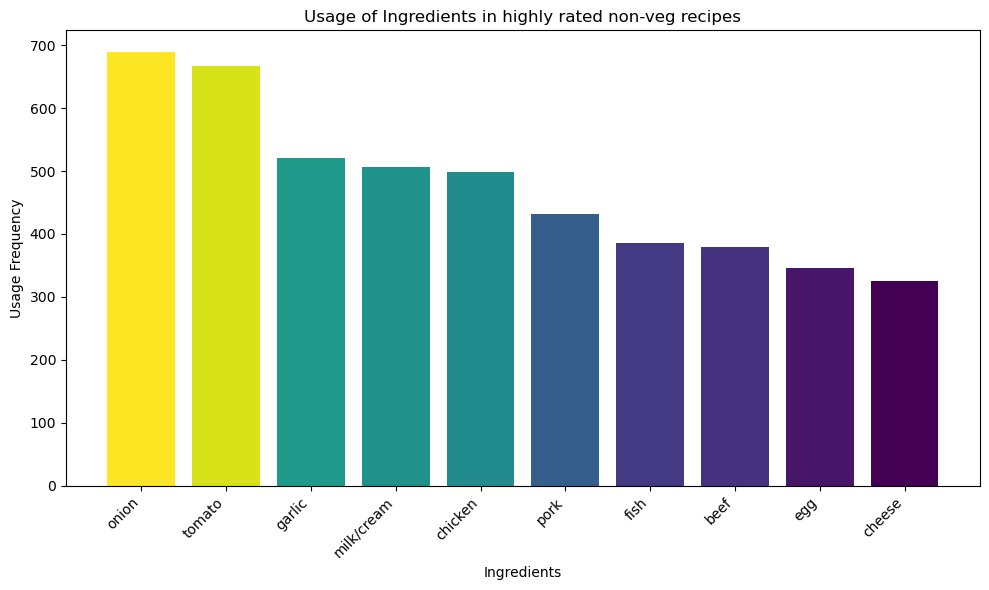

In [53]:
# Create a bar plot
import matplotlib

cmap = matplotlib.colormaps['viridis']
norm = plt.Normalize(nvg.min(), nvg.max())
plt.figure(figsize=(10, 6))
plt.bar(nvg.index, nvg.values, color=cmap(norm(nvg.values)))
plt.xlabel('Ingredients')
plt.ylabel('Usage Frequency')
plt.title('Usage of Ingredients in highly rated non-veg recipes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation:
            Top 10 common ingredients in highly rated(above 4.0) non-veg rapcipes.

In [54]:
vg = df2[ingredients][df2.rating >= 4.0][df2.vegetarian==1].sum().sort_values(ascending=False)
vg = vg[:10]
vg

milk/cream    395.0
egg           380.0
cheese        278.0
onion         222.0
tomato        218.0
nut           217.0
chocolate     201.0
potato        168.0
garlic        153.0
lemon         153.0
dtype: float64

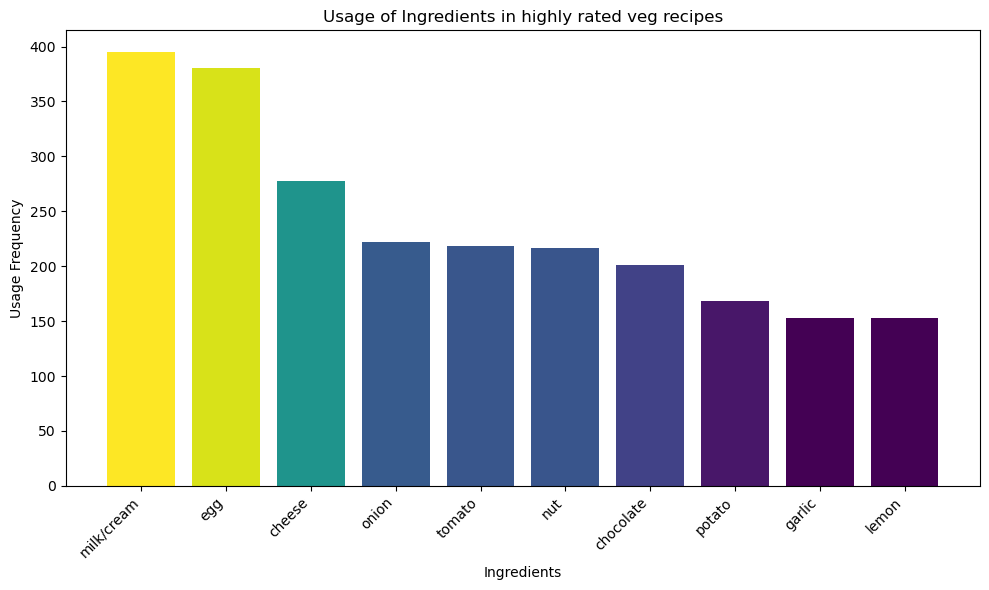

In [55]:
cmap = matplotlib.colormaps['viridis']
norm = plt.Normalize(vg.min(), vg.max())
plt.figure(figsize=(10, 6))
plt.bar(vg.index, vg.values, color=cmap(norm(vg.values)))
plt.xlabel('Ingredients')
plt.ylabel('Usage Frequency')
plt.title('Usage of Ingredients in highly rated veg recipes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation:
            Top 10 common ingredients in highly rated(above 4.0) veg recipes.

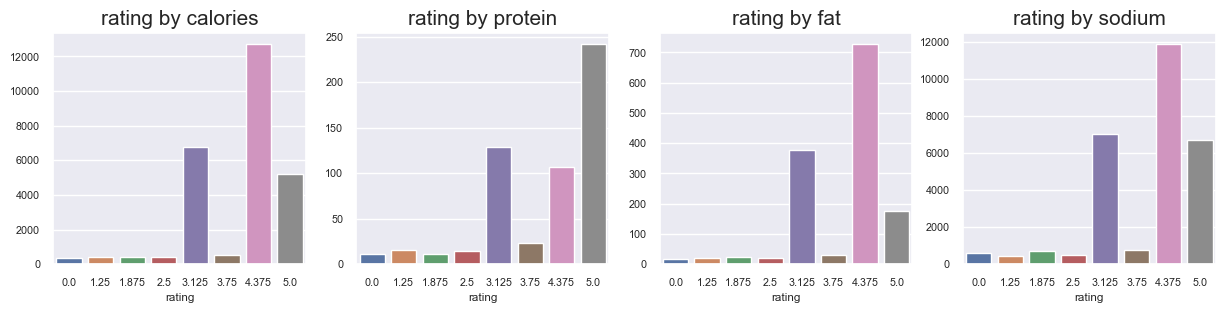

In [56]:
#plotting health metrics against recipe rating
dict_plt = {0:'calories',1:'protein',2:'fat',3:'sodium'}

sns.set(font_scale=.7)

fig, ax = plt.subplots(1,4, figsize=(15,3))

for i in range(4):
    sns.barplot(x='rating',y=dict_plt[i], data=df2, ax=ax[i], errorbar=None)
    ax[i].set_title('rating by {}'.format(dict_plt[i]), size=15)
    ax[i].set_ylabel('')


## Observation:
1. Most recipes cluster around the ratings of 3.75 and 4.375, indicating that calorie-dense recipes tend to receive better ratings overall.
2. Recipes with a rating of 5 show the highest amount of protein, followed by those rated 4.375 and 3.75.
3. There is a noticeable increase in fat content from 3.75 to 4.375 ratings, indicating that recipes with moderate fat content are highly rated.
4. Sodium levels are the highest in recipes rated 4.375, followed by those rated 5 and 3.75.
5. Across all four health metrics, recipes that are rated 4.375 and 5 tend to have significantly more calories, protein, fat, and sodium. This suggests that more nutrient-dense or rich meals tend to receive higher ratings.
6. Recipes with ratings below 2.5 generally have lower amounts of calories, protein, fat, and sodium. This may indicate that these recipes are either less flavorful or less satisfying, resulting in lower ratings.

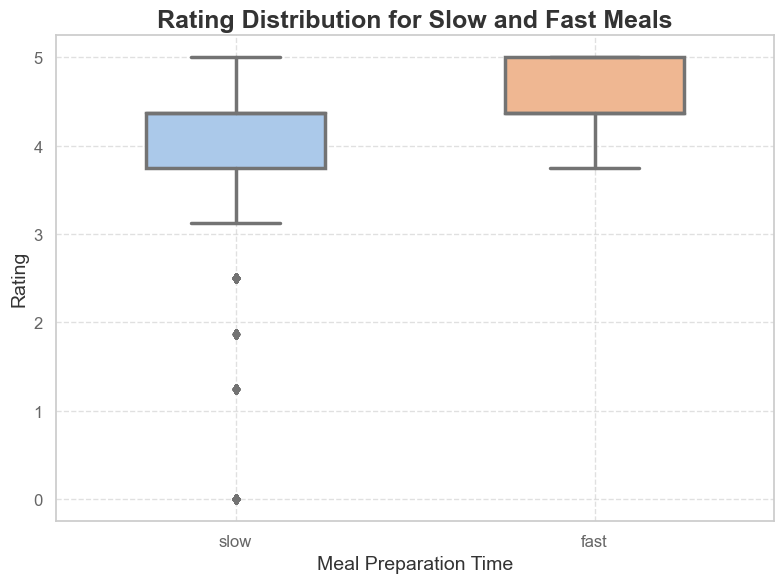

In [57]:
# Set the overall theme
sns.set(style="whitegrid", palette="pastel")

# Create the boxplot
plt.figure(figsize=(8, 6))
box = sns.boxplot(x='22-minute meals', y='rating', data=df2, width=0.5, linewidth=2.5)

# Change the x-axis labels from 0/1 to 'slow'/'fast'
box.set_xticklabels(['slow', 'fast'])

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the plot aesthetics
box.set_title('Rating Distribution for Slow and Fast Meals', fontsize=18, fontweight='bold', color='#333333')
box.set_xlabel('Meal Preparation Time', fontsize=14, color='#333333')
box.set_ylabel('Rating', fontsize=14, color='#333333')

# Customize tick label sizes and rotation
box.tick_params(labelsize=12, colors='#666666')
plt.xticks(rotation=0)  # No rotation needed for 'slow'/'fast'

# Show the plot
plt.tight_layout()
plt.show()

## Observation:
1. The median rating for slow meals is around 4.0 where The median rating for fast meals is slightly higher than that for slow meals, at around 4.7.
2. The IQR shows that the middle 50% of ratings for slow meals are roughly between 3.8 and 4.7 where The IQR of fast meals is more compressed, with ratings between 4.5 and 5 for the middle 50% of the data.
3. There are a few outliers, with ratings as low as 0 and 2, indicating that a few people gave these slow meals low ratings. No outliers are present in the fast meal category, suggesting a more consistent rating distribution with fewer extreme values.
4. Fast meals tend to receive higher and more consistent ratings compared to slow meals

#  Improvement Of The User Experience For A Recipe Platform
## Personalized Recipe Recommendations:
Since most recipes cluster around ratings of 3.75 to 4.375, the platform can prioritize showing these highly rated recipes more prominently to new or returning users. It ensures users are more likely to try well-liked recipes, improving satisfaction.
With 66.1% of highly-rated recipes being non-vegetarian, the platform could emphasize non-vegetarian recipes to users who express no dietary restrictions, improving relevance. By identifying the top 10 common ingredients in both highly-rated vegetarian and non-vegetarian recipes, the platform can recommend specific recipes based on popular ingredient preferences, offering users what is already well-loved by others.
## Time-Sensitive Recommendations:
With fast meals (those that take less time to prepare) receiving higher and more consistent ratings than slow meals, the platform could develop a "Quick & Popular" section for users seeking highly-rated meals that are fast to make. Since fast meals have a median rating of 4.7 (higher than slow meals), the platform could surface these recipes for users in a hurry or users who typically engage with fast recipes, improving the user experience for time-sensitive cooks.
## Enhanced Filtering and Search Options:
Users can be given more granular filtering options based on the meal preparation time (fast or slow), aligning with their preferences and available time. Fast meals generally have better ratings, so this can be a default sorting option for users in a hurry. Given the insights on the top 10 common ingredients in highly-rated recipes, the platform could offer users more refined search options to find recipes featuring these popular ingredients. This could help users discover new favorite dishes faster.
## Addressing Outliers and Low Ratings:
Recipes rated below 2.5 are generally less nutrient-dense and may be less flavorful or satisfying. The platform could identify commonalities among these recipes and work with chefs or creators to improve them, potentially elevating the user experience by improving low-rated options. The presence of outliers in slow meals (i.e., some with very low ratings) suggests some users are dissatisfied with them. The platform can gather feedback from users about these outliers to understand why certain slow meals perform poorly and either improve these recipes or highlight better-performing alternatives.